# L1 regularization for two dimensions

Toy example to illustrate ***coordinate ascent/descent*** with L1 regularization in 2 dimensions.

>$$Y = X\theta$$
>
> * $X \in R^{2 \times m}$
> 
> * $Y \in R^{1 \times m}$
> $$Y = X_0\theta_0 + X_1\theta_1$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Hyperboloid2.png/225px-Hyperboloid2.png)

$$\frac {x^2}{a^2} + \frac {y^2}{b^2} - \frac {z^2}{c^2} = -1$$

In [473]:
import numpy as np

In [474]:
def hiperboloid(x,y,a=1,b=1,c=0.5):
    z = np.sqrt(x**2/a**2 + y**2/b**2 + c**2)
    return np.asarray([-z, z])

In [475]:
hiperboloid(0,0)

array([-0.5,  0.5])

In [476]:
grid = np.asarray([[x,y] for x in range(3) for y in range(3)])
grid

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2]])

In [477]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [478]:
grid = np.asarray([[x,y] for x in range(-10,10) for y in range(-10,10)])
z    = np.asarray([hiperboloid(x,y) for x,y in grid])

In [479]:
grid.shape

(400, 2)

In [480]:
z.shape

(400, 2)

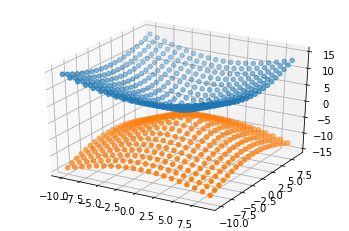

In [500]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
# Positive z
ax.scatter(grid[:,0], grid[:,1], z[:,1])
# Negative z
ax.scatter(grid[:,0], grid[:,1], z[:,0])
ax.plot([0]*2, [0]*2, [-1,1])
plt.show()

I want to find a plane that separate samples from a population with distribution as in the picture, with some noise

In [501]:
def noise_sample(x,y):
    noise = np.random.normal(0,1)
    return hiperboloid(x,y) + noise

In [502]:
def norm1(X):
    return np.linalg.norm(X, ord=1)

def norm2(X):
    if X.ndim > 1:
        X = X[:,0]
    return np.linalg.norm(X, ord=2)

In [503]:
# Least squares with L1 regularization
def l1ls(X, y, lambd=1):
    if X.ndim!=2:
        print("Error! X.ndim != 2")
        return 0
    if y.ndim!=2:
        print("Error! y.ndim != 2")
        return 0
    n = X.shape[1]
    theta = np.zeros((n, 1)) 
    last_theta = np.ones((n, 1))
    theta_dimensions = theta.shape[0]
    epoch = 0
    while np.linalg.norm((theta - last_theta), ord=1) > 1e-7 and epoch < 1000:
        last_theta = theta.copy()
        for i in range(theta_dimensions):
            # theta_i
            theta_i = theta[i,0].copy()
            # theta_bar + theta_i == theta
            theta[i,0] = 0.0
            # Searching for optimal theta
            # First case: theta_i > 0
            Xi = X[:,i, np.newaxis]
            theta_i_pos = -(np.dot(Xi.T, (np.dot(X, theta) - y)) + lambd) / \
                            np.dot(Xi.T, Xi)
            theta_i_pos = np.max(theta_i_pos, 0)
            # Second case: theta_i < 0
            theta_i_neg = -(np.dot(Xi.T, (np.dot(X, theta) - y)) - lambd) / \
                            np.dot(Xi.T, Xi)
            theta_i_neg = np.min(theta_i_neg, 0)
            # Loss/objective/risk/energy/error function
            # Check loss with first case
            theta[i, 0] = theta_i_pos[0]
            loss_pos = 1/2 * norm2(np.dot(X, theta) - y)**2 + \
                                lambd*norm1(theta)
            # Check loss with second case
            theta[i, 0] = theta_i_neg[0]
            loss_neg = 1/2 * norm2(np.dot(X, theta) - y)**2 + \
                                lambd*norm1(theta)
            # Choose best one
            if loss_pos < loss_neg:
                theta[i, 0] = theta_i_pos[0]
            elif loss_pos > loss_neg:
                theta[i, 0] = theta_i_neg[0]
            else:
                # Same loss, choose theta randomly
                theta[i, 0] = np.random.choice((theta_i_pos[0],theta_i_neg[0]))
            theta_optimal = np.argmin((loss_pos, loss_neg))
        epoch += 1
        print("Loss: {:3.4f}\n".format(1/2 * norm2(np.dot(X,theta) - y)**2 + lambd*norm1(theta)) )
    return theta

In [504]:
grid.shape

(400, 2)

In [505]:
theta.shape

AttributeError: 'int' object has no attribute 'shape'

In [506]:
z.shape

(400, 2)

In [507]:
np.dot(grid, theta).shape

(400, 2)

In [508]:
n = grid.shape[1] # 2 dimensions
theta = np.zeros((n, 1)) 
last_theta = np.ones((n, 1))
i=0
while np.linalg.norm((theta - last_theta), ord=1) > 1e-10 and i < 100:
    print('# epoch :', i, end=" - ")
    last_theta = theta.copy()
    theta = l1ls(grid, z[:,0], theta.copy())
    i += 1
print("Best theta:",theta)

# epoch : 0 - Error! y.ndim != 2
Best theta: 0


In [509]:
z.flatten()[:, np.newaxis].shape

(800, 1)

In [510]:
grid.shape

(400, 2)

In [511]:
dup_grid = np.asarray([np.repeat(grid[:,0], 2),
                       np.repeat(grid[:,1], 2)]).T
dup_grid.shape

(800, 2)

In [512]:
theta = l1ls(dup_grid, z.flatten()[:, np.newaxis], lambd=1)
print("Best theta:",theta)

Loss: 26900.0001

Loss: 26900.0001

Loss: 26900.0001

Best theta: [[-3.7037037e-05]
 [-3.7037037e-05]]


As we expected, the plane that divides better the data has coefficients close to zero.

* Note: **Hiperboloids** of the form
  $$\frac {x^2}{a^2} + \frac {y^2}{b^2} - \frac {z^2}{c^2} = -1$$
  **are symmetric** over the XY plane (and all other planes: XZ, YZ)

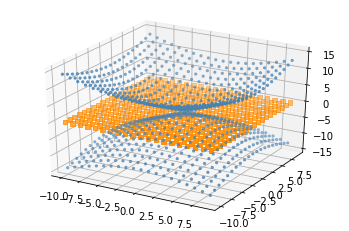

In [513]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
# Positive z
ax.scatter(dup_grid[:,0], dup_grid[:,1], z.flatten(), marker=".", color="steelblue")
ax.scatter(grid[:,0], grid[:,1], np.dot(grid,theta), color="darkorange", marker="s")
plt.show()

## Simpler problem

to visualize lambda

In [514]:
def some_plain(x,y):
    # x slope
    pi = np.pi
    # y slope
    e  = np.exp(1)
    z = pi*x + e*y
    return z

def noisy_plain(x,y):
    noise = np.random.normal(0, 10)
    z = some_plain(x,y) + noise
    return z

In [515]:
grid = np.asarray([[x,y] for x in range(-10,10) for y in range(-10,10)])
z    = np.asarray([some_plain(x,y) for x,y in grid])

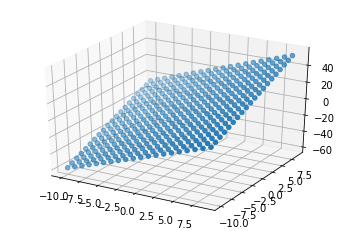

In [516]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
# z
ax.scatter(grid[:,0], grid[:,1], z)
plt.show()

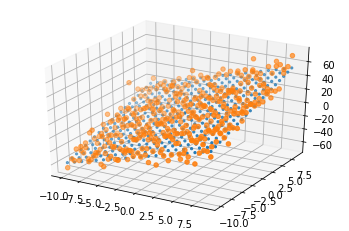

In [517]:
noisy_z = np.asarray([noisy_plain(x,y) for x,y in grid])

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
# Positive z
ax.scatter(grid[:,0], grid[:,1], z, marker=".")
# Negative z
ax.scatter(grid[:,0], grid[:,1], noisy_z)
ax.plot([0]*2, [0]*2, [-1,1])
plt.show()

In [518]:
theta = l1ls(grid, noisy_z[:, np.newaxis], lambd=10000)
print("Best theta:",theta)

Loss: 70156.1113

Loss: 70154.7292

Loss: 70154.7292

Loss: 70154.7292

Best theta: [[2.41024594]
 [1.92463768]]


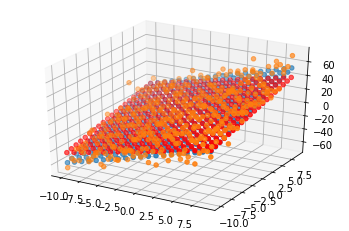

In [519]:
pred_z = np.dot(grid, theta)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
# Positive z
ax.scatter(grid[:,0], grid[:,1], z)
# Negative z
ax.scatter(grid[:,0], grid[:,1], pred_z, c="red")
# Negative z
ax.scatter(grid[:,0], grid[:,1], noisy_z)
plt.show()

Checking L2 regularization solution (simpler)

In [520]:
def l2ls(X, y, lambd=1):
    XtX = np.dot(X.T, X)
    Xty = np.dot(X.T, y)
    I = np.eye(X.shape[1])
    theta_star = np.dot(np.linalg.inv(XtX + lambd*I), Xty)
    return theta_star

In [521]:
theta = l2ls(grid, noisy_z)
print("Best theta: [{:2.4f}, {:2.4f}] \n".format(theta[0], theta[1]))
print("Orig theta: [{:2.4f}, {:2.4f}] \n".format(np.pi, np.exp(1)))

print("Difference: [{:2.4f}, {:2.4f}]".format(theta[0]-np.pi, theta[1]-np.exp(1)))

Best theta: [3.1508, 2.6652] 

Orig theta: [3.1416, 2.7183] 

Difference: [0.0092, -0.0531]


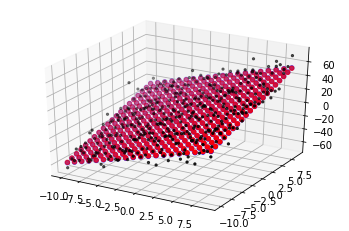

In [522]:
pred_z = np.dot(grid, theta)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
# Positive z
ax.scatter(grid[:,0], grid[:,1], z, color="blue")

ax.scatter(grid[:,0], grid[:,1], noisy_z, marker=".", color="black")

ax.scatter(grid[:,0], grid[:,1], pred_z, c="red")
plt.show()

# Lambdas

Lets try to visualize what happens for different regularization parameters lambda:

In [523]:
thetas=[]
start=-2 #10**start
stop=6   #10**stop
for l in np.logspace(start, stop, num=10):
    theta = l2ls(grid, noisy_z, lambd=l)
    thetas.append(theta)


In [524]:
pred_zs =[]
for theta in thetas:
    pred_z = np.dot(grid, theta)
    pred_zs.append(pred_z)

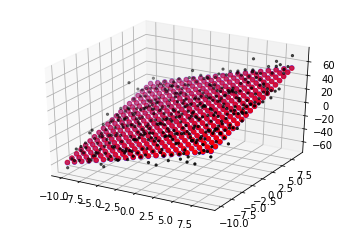

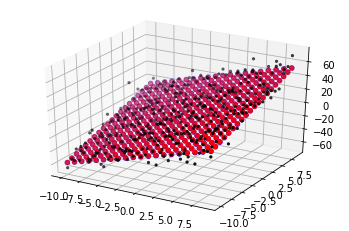

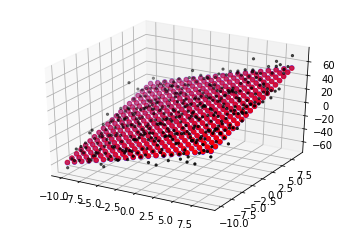

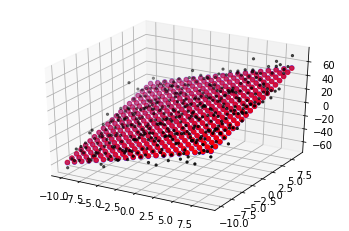

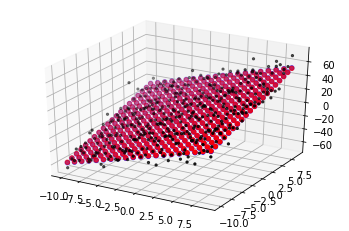

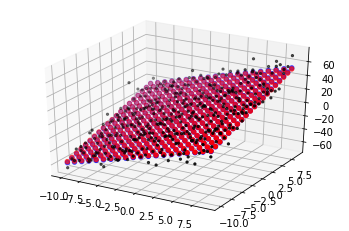

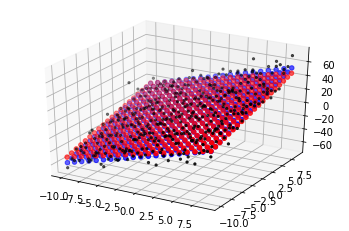

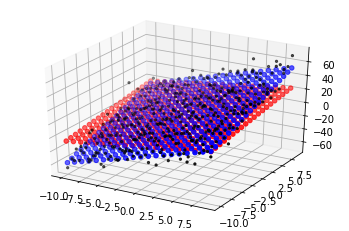

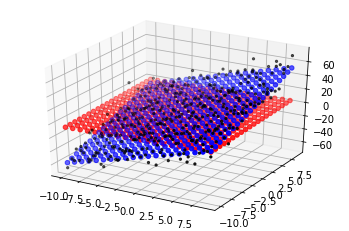

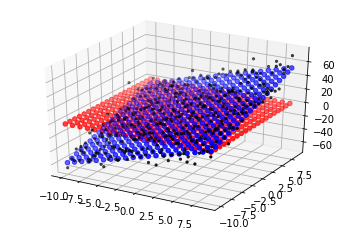

In [525]:
for pred_z in pred_zs:
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection='3d')
    # Positive z
    ax.scatter(grid[:,0], grid[:,1], z, color="blue")

    ax.scatter(grid[:,0], grid[:,1], noisy_z, marker=".", color="black")

    ax.scatter(grid[:,0], grid[:,1], pred_z, c="red")
    plt.show()